In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('food_order.csv')
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [3]:
print("="*80)
print("DATASET OVERVIEW")
print("="*80)
print(f"Dataset shape: {df.shape}")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nData types:\n{df.dtypes}")
print(f"\nBasic statistics:\n{df.describe()}")

DATASET OVERVIEW
Dataset shape: (1898, 9)

First few rows:
   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                     25   
1              12.08         Weekend  Not given                     25   
2              12.23         Weekday          5                     23   
3              29.20         Weekend          3                     25   
4              11.59         Weekday          4                     25   

   delivery_time  
0             20  
1             23  
2             28  
3          

In [6]:
# DATA CLEANING
# ============================================================================
print("\n" + "="*80)
print("DATA CLEANING REPORT")
print("="*80)

# 1. Check for missing values
print("\nMissing values:")
missing = df.isnull().sum()
print(missing[missing > 0] if missing.sum() > 0 else "No missing values!")

# Handle missing values if found
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['int64', 'float64']:
            df[col].fillna(df[col].median(), inplace=True)
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)

# 2. Remove duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicates}")
df.drop_duplicates(inplace=True)

# 3. Data type conversion
print("\nData type conversions:")
# Convert date columns if they exist (excluding delivery_time and food_preparation_time)
date_columns = [col for col in df.columns if ('date' in col.lower() or 'time' in col.lower()) 
                and col not in ['delivery_time', 'food_preparation_time']]
for col in date_columns:
    try:
        df[col] = pd.to_datetime(df[col])
        print(f"  - {col}: converted to datetime")
    except:
        pass

# Convert rating to float (using pd.to_numeric to handle strings)
try:
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
    print(f"  - rating: converted to float")
except:
    pass

# 4. Identify and handle outliers
print("\nOutlier detection (using IQR method):")
numeric_cols = df.select_dtypes(include=[np.number]).columns
outliers_found = False
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
    if outlier_count > 0:
        print(f"  - {col}: {outlier_count} outliers detected")
        outliers_found = True

if not outliers_found:
    print("  No significant outliers detected")

# 5. Clean text data
print("\nText data cleaning:")
text_cols = df.select_dtypes(include=['object']).columns
for col in text_cols:
    # Remove leading/trailing whitespace
    df[col] = df[col].str.strip()
    print(f"  - {col}: whitespace trimmed")

print(f"\nCleaned dataset shape: {df.shape}")
print("Cleaning complete!")


DATA CLEANING REPORT

Missing values:
No missing values!

Duplicate rows: 0

Data type conversions:
  - rating: converted to float

Outlier detection (using IQR method):
  No significant outliers detected

Text data cleaning:
  - restaurant_name: whitespace trimmed
  - cuisine_type: whitespace trimmed
  - day_of_the_week: whitespace trimmed

Cleaned dataset shape: (1898, 9)
Cleaning complete!


In [7]:
# ============================================================================
# CALCULATE KEY METRICS
# ============================================================================
print("\n" + "="*80)
print("KEY BUSINESS METRICS")
print("="*80)

total_orders = df['order_id'].nunique()
total_customers = df['customer_id'].nunique()
avg_order_value = df['cost_of_the_order'].mean()
avg_rating = float(df['rating'].mean())
avg_prep_time = df['food_preparation_time'].mean()
avg_delivery_time = df['delivery_time'].mean()

print(f"\nTotal Orders: {total_orders:,}")
print(f"Total Customers: {total_customers:,}")
print(f"Average Order Value: ${avg_order_value:.2f}")
print(f"Average Rating: {avg_rating:.2f}/5.0")
print(f"Average Food Preparation Time: {avg_prep_time:.0f} minutes")
print(f"Average Delivery Time: {avg_delivery_time:.0f} minutes")
print(f"Total Revenue: ${(avg_order_value * total_orders):.2f}")
print(f"Average Orders per Customer: {(total_orders / total_customers):.2f}")


KEY BUSINESS METRICS

Total Orders: 1,898
Total Customers: 1,200
Average Order Value: $16.50
Average Rating: 4.34/5.0
Average Food Preparation Time: 27 minutes
Average Delivery Time: 24 minutes
Total Revenue: $31314.82
Average Orders per Customer: 1.58



GENERATING VISUALIZATIONS
✓ Generated histograms for numeric columns
✓ Generated bar charts for categorical columns
✓ Generated correlation heatmap

✓ Saved visualization: food_order_analysis.png


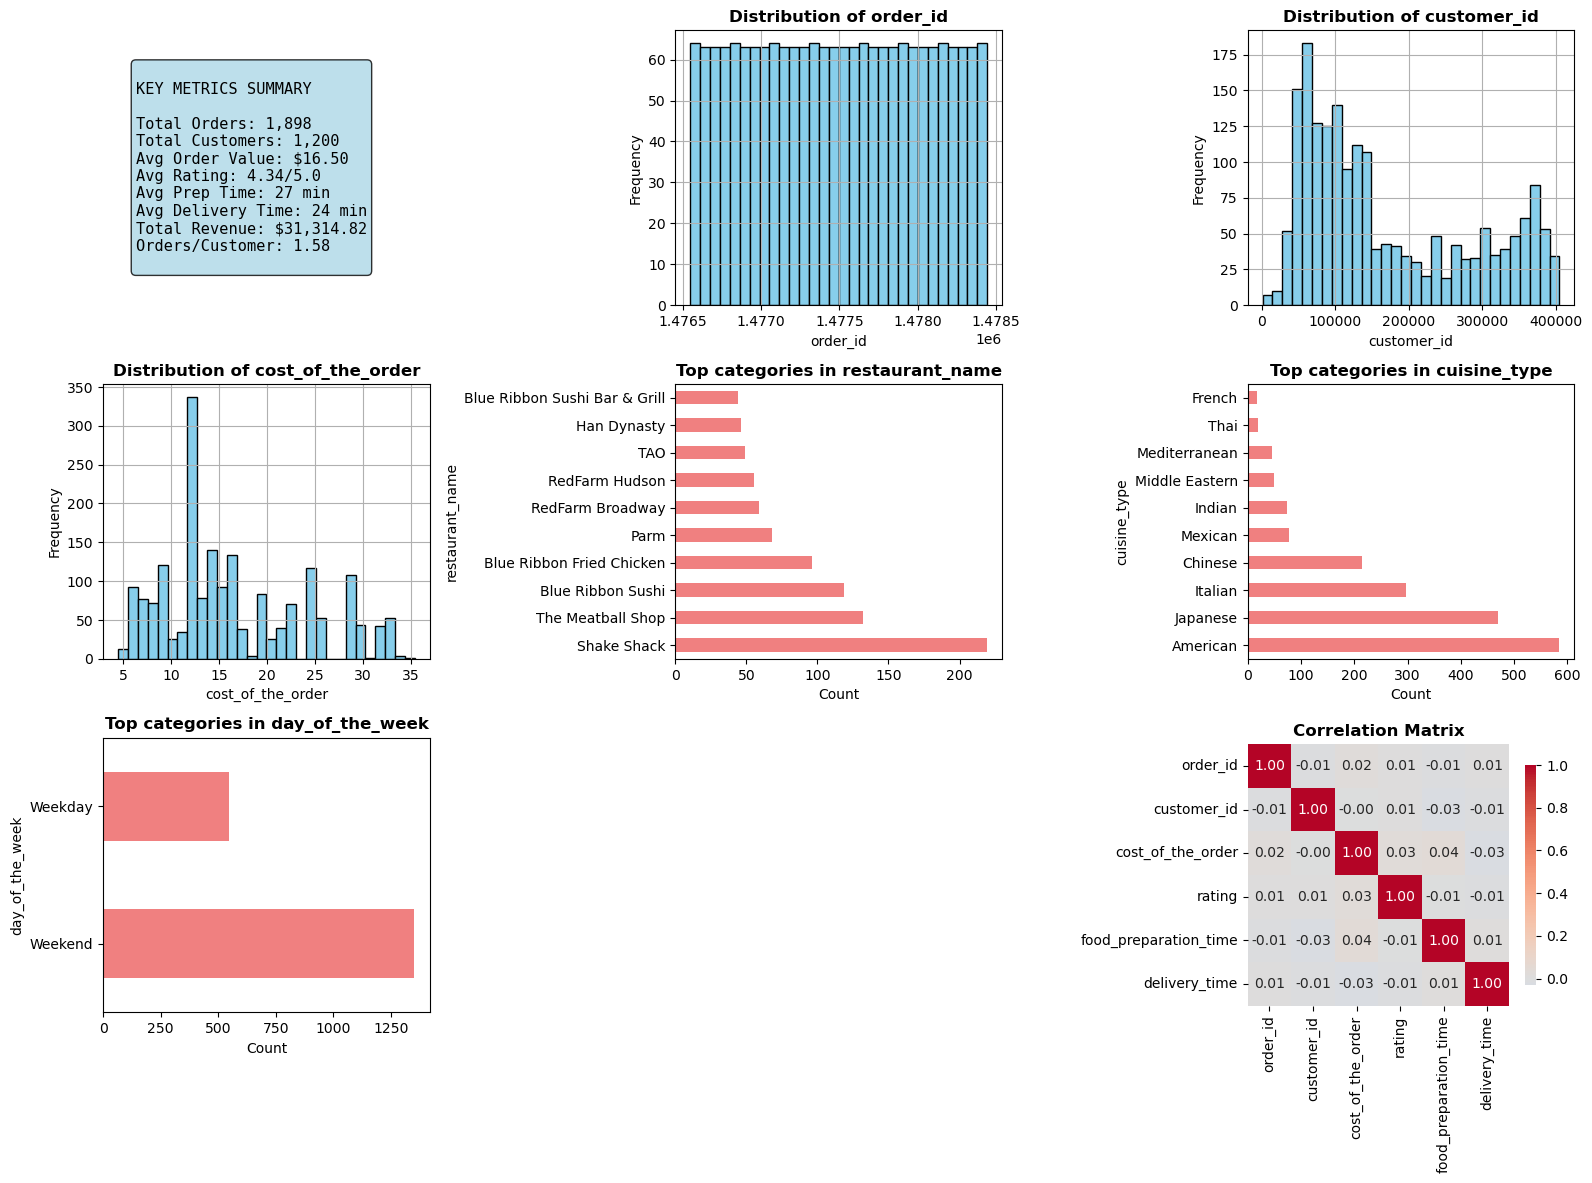

In [8]:
# DATA VISUALIZATION
# ============================================================================
print("\n" + "="*80)
print("GENERATING VISUALIZATIONS")
print("="*80)

# Create a comprehensive visualization dashboard
fig = plt.figure(figsize=(16, 12))

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# 1. Key Metrics Summary (Top Left)
ax1 = plt.subplot(3, 3, 1)
ax1.axis('off')
metrics_text = f"""
KEY METRICS SUMMARY

Total Orders: {total_orders:,}
Total Customers: {total_customers:,}
Avg Order Value: ${avg_order_value:.2f}
Avg Rating: {avg_rating:.2f}/5.0
Avg Prep Time: {avg_prep_time:.0f} min
Avg Delivery Time: {avg_delivery_time:.0f} min
Total Revenue: ${(avg_order_value * total_orders):,.2f}
Orders/Customer: {(total_orders / total_customers):.2f}
"""
ax1.text(0.1, 0.5, metrics_text, fontsize=11, family='monospace',
         verticalalignment='center', bbox=dict(boxstyle='round', 
         facecolor='lightblue', alpha=0.8))

# 2. Distribution of numeric features
if len(numeric_cols) > 0:
    for idx, col in enumerate(numeric_cols[:3], 2):
        plt.subplot(3, 3, idx)
        df[col].hist(bins=30, edgecolor='black', color='skyblue')
        plt.title(f'Distribution of {col}', fontweight='bold')
        plt.xlabel(col)
        plt.ylabel('Frequency')
    print(f"✓ Generated histograms for numeric columns")

# 3. Categorical distribution
if len(categorical_cols) > 0:
    start_idx = 5
    for idx, col in enumerate(categorical_cols[:min(3, 9-start_idx)], start_idx):
        plt.subplot(3, 3, idx)
        df[col].value_counts().head(10).plot(kind='barh', color='lightcoral')
        plt.title(f'Top categories in {col}', fontweight='bold')
        plt.xlabel('Count')
    print(f"✓ Generated bar charts for categorical columns")

# 4. Correlation heatmap (if multiple numeric columns)
if len(numeric_cols) > 1:
    plt.subplot(3, 3, 9)
    corr_matrix = df[numeric_cols].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, fmt='.2f', cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix', fontweight='bold')
    print(f"✓ Generated correlation heatmap")

plt.tight_layout()
plt.savefig('food_order_analysis.png', dpi=300, bbox_inches='tight')
print(f"\n✓ Saved visualization: food_order_analysis.png")
plt.show()

✓ Saved visualization: food_order_boxplots.png


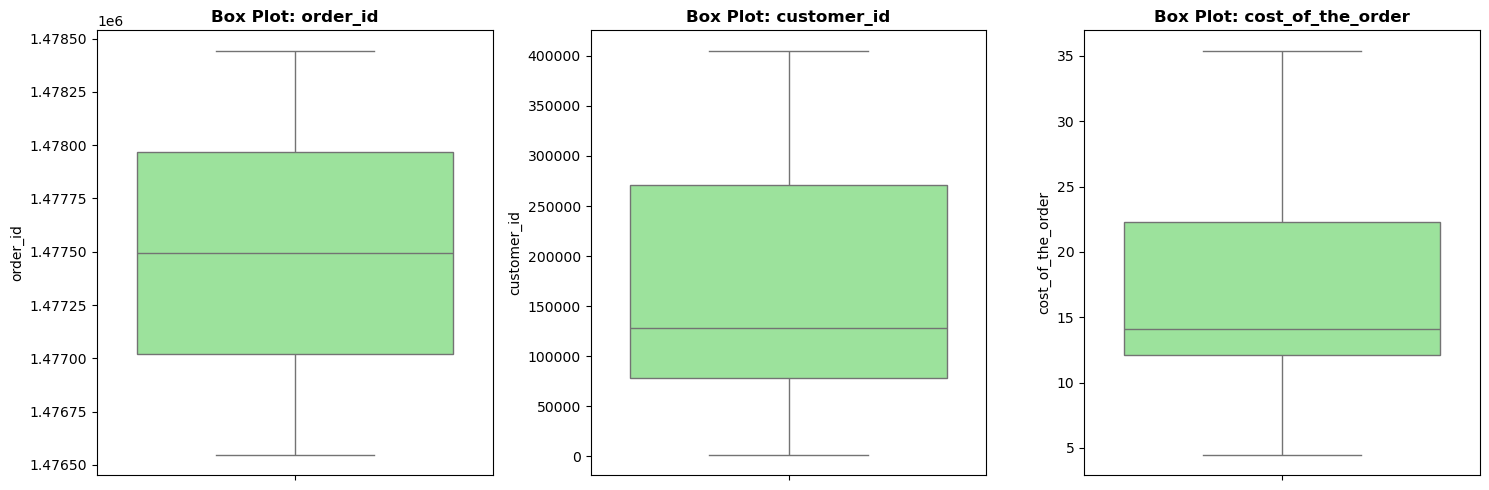

In [9]:
# ============================================================================
# ADDITIONAL VISUALIZATIONS
# ============================================================================

# Box plots for numeric features
if len(numeric_cols) > 0:
    fig, axes = plt.subplots(1, min(3, len(numeric_cols)), figsize=(15, 5))
    if len(numeric_cols) == 1:
        axes = [axes]
    for idx, col in enumerate(numeric_cols[:3]):
        sns.boxplot(data=df, y=col, ax=axes[idx], color='lightgreen')
        axes[idx].set_title(f'Box Plot: {col}', fontweight='bold')
    plt.tight_layout()
    plt.savefig('food_order_boxplots.png', dpi=300, bbox_inches='tight')
    print("✓ Saved visualization: food_order_boxplots.png")
    plt.show()


✓ Saved visualization: food_order_metrics_dashboard.png


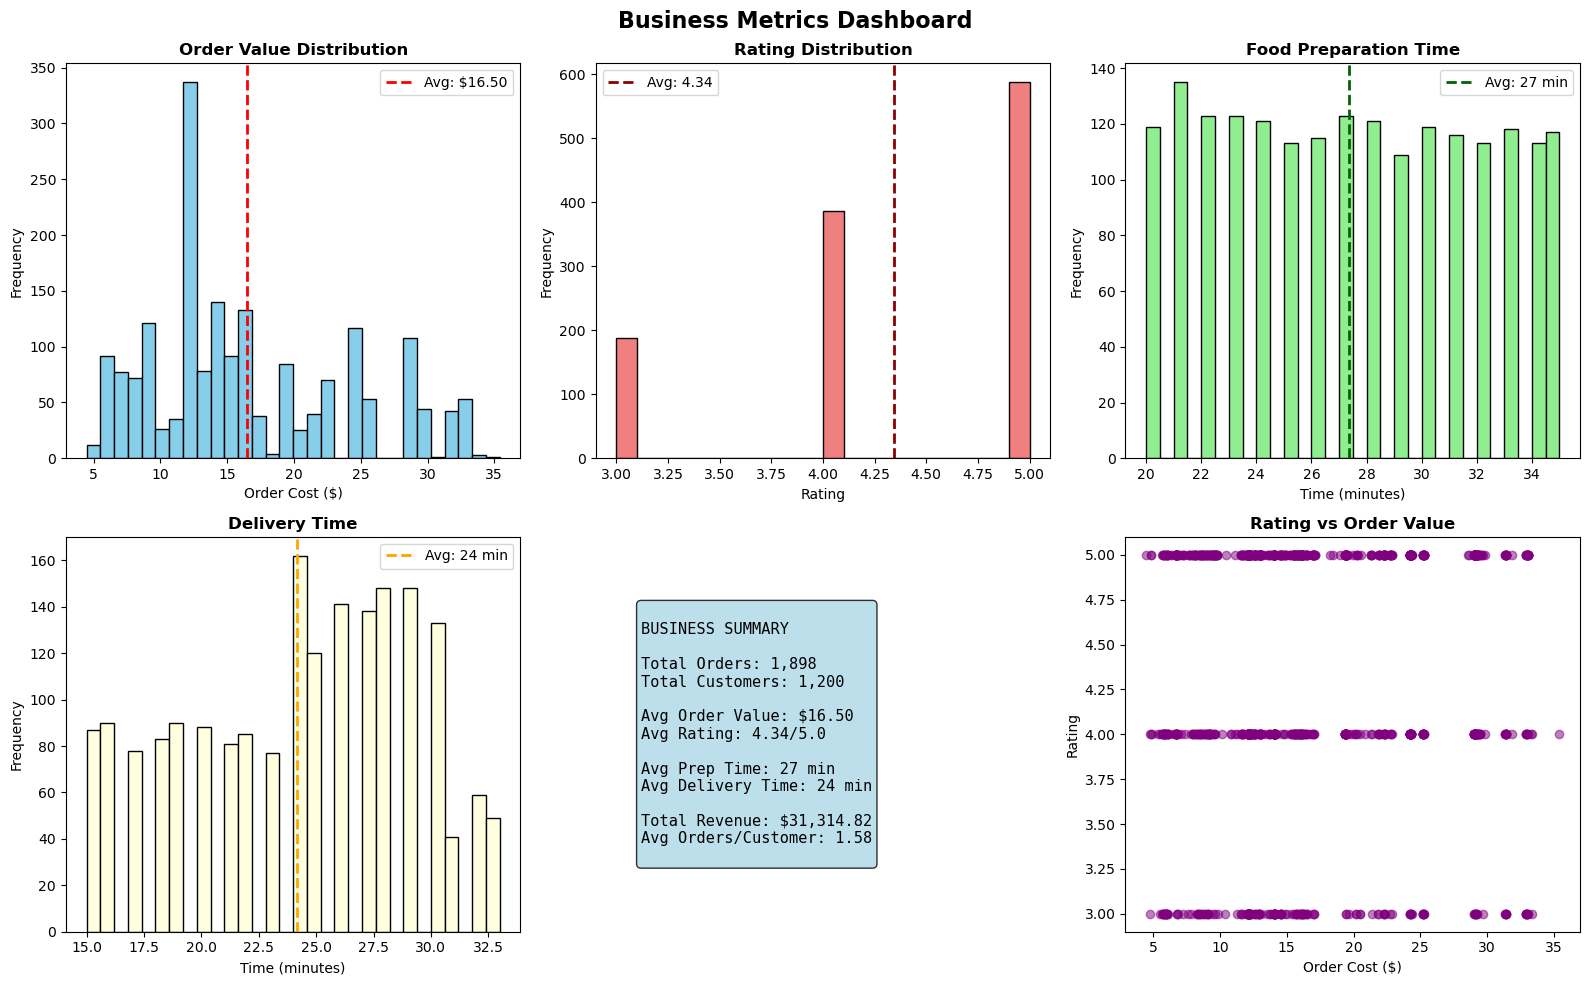

In [10]:
# ============================================================================
# METRICS VISUALIZATION
# ============================================================================

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('Business Metrics Dashboard', fontsize=16, fontweight='bold')

# Plot 1: Order Value Distribution
axes[0, 0].hist(df['cost_of_the_order'], bins=30, color='skyblue', edgecolor='black')
axes[0, 0].axvline(avg_order_value, color='red', linestyle='--', linewidth=2, label=f'Avg: ${avg_order_value:.2f}')
axes[0, 0].set_title('Order Value Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Order Cost ($)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# Plot 2: Rating Distribution
axes[0, 1].hist(df['rating'], bins=20, color='lightcoral', edgecolor='black')
axes[0, 1].axvline(avg_rating, color='darkred', linestyle='--', linewidth=2, label=f'Avg: {avg_rating:.2f}')
axes[0, 1].set_title('Rating Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Rating')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()

# Plot 3: Food Preparation Time
axes[0, 2].hist(df['food_preparation_time'], bins=30, color='lightgreen', edgecolor='black')
axes[0, 2].axvline(avg_prep_time, color='darkgreen', linestyle='--', linewidth=2, label=f'Avg: {avg_prep_time:.0f} min')
axes[0, 2].set_title('Food Preparation Time', fontweight='bold')
axes[0, 2].set_xlabel('Time (minutes)')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].legend()

# Plot 4: Delivery Time
axes[1, 0].hist(df['delivery_time'], bins=30, color='lightyellow', edgecolor='black')
axes[1, 0].axvline(avg_delivery_time, color='orange', linestyle='--', linewidth=2, label=f'Avg: {avg_delivery_time:.0f} min')
axes[1, 0].set_title('Delivery Time', fontweight='bold')
axes[1, 0].set_xlabel('Time (minutes)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()

# Plot 5: Key Metrics Summary
axes[1, 1].axis('off')
metrics_summary = f"""
BUSINESS SUMMARY

Total Orders: {total_orders:,}
Total Customers: {total_customers:,}

Avg Order Value: ${avg_order_value:.2f}
Avg Rating: {avg_rating:.2f}/5.0

Avg Prep Time: {avg_prep_time:.0f} min
Avg Delivery Time: {avg_delivery_time:.0f} min

Total Revenue: ${(avg_order_value * total_orders):,.2f}
Avg Orders/Customer: {(total_orders / total_customers):.2f}
"""
axes[1, 1].text(0.1, 0.5, metrics_summary, fontsize=11, family='monospace',
                verticalalignment='center', bbox=dict(boxstyle='round', 
                facecolor='lightblue', alpha=0.8))

# Plot 6: Rating vs Order Value scatter
axes[1, 2].scatter(df['cost_of_the_order'], df['rating'], alpha=0.5, color='purple')
axes[1, 2].set_title('Rating vs Order Value', fontweight='bold')
axes[1, 2].set_xlabel('Order Cost ($)')
axes[1, 2].set_ylabel('Rating')

plt.tight_layout()
plt.savefig('food_order_metrics_dashboard.png', dpi=300, bbox_inches='tight')
print("✓ Saved visualization: food_order_metrics_dashboard.png")
plt.show()

In [11]:
# ============================================================================
# SAVE CLEANED DATASET
# ============================================================================
df.to_csv('food_order_cleaned.csv', index=False)
print("\n✓ Saved cleaned dataset: food_order_cleaned.csv")


✓ Saved cleaned dataset: food_order_cleaned.csv


In [12]:
# ============================================================================
# SUMMARY REPORT
# ============================================================================
print("\n" + "="*80)
print("CLEANING & ANALYSIS SUMMARY")
print("="*80)
print(f"Original shape: food_order.csv")
print(f"Cleaned shape: {df.shape}")
print(f"Rows removed: {len(pd.read_csv('food_order.csv')) - len(df)}")
print(f"\nDataset Info:")
print(f"  - Numeric columns: {len(numeric_cols)}")
print(f"  - Categorical columns: {len(categorical_cols)}")
print(f"  - Total columns: {len(df.columns)}")
print(f"\nFiles generated:")
print(f"  1. food_order_cleaned.csv (cleaned dataset)")
print(f"  2. food_order_analysis.png (main visualizations)")
print(f"  3. food_order_boxplots.png (box plot analysis)")
print(f"  4. food_order_metrics_dashboard.png (business metrics dashboard)")
print("="*80)


CLEANING & ANALYSIS SUMMARY
Original shape: food_order.csv
Cleaned shape: (1898, 9)
Rows removed: 0

Dataset Info:
  - Numeric columns: 6
  - Categorical columns: 3
  - Total columns: 9

Files generated:
  1. food_order_cleaned.csv (cleaned dataset)
  2. food_order_analysis.png (main visualizations)
  3. food_order_boxplots.png (box plot analysis)
  4. food_order_metrics_dashboard.png (business metrics dashboard)
